In [1]:

import networkx as nx
import numpy as np
from numpy import linalg as LA
import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans, whiten
from itertools import combinations

In [2]:
inputfile = './Data/Wiki-Vote.txt'

main_graph = nx.Graph()
with open(inputfile, "r") as file:
    lines = file.readlines()
    for line in lines:
        values = line.strip().split()

        main_graph.add_edges_from([(values[0], values[1])])

In [3]:
m = main_graph.number_of_edges()
num_nodes = main_graph.number_of_nodes()
print("Number of nodes: ", num_nodes)
print("Number of edges: ", m)

Number of nodes:  7115
Number of edges:  100762


In [4]:
def modularity_matrix(G):
  num_node = G.number_of_nodes()
  m = G.number_of_edges()
  nodes = G.nodes()
  B = np.zeros((num_node,num_node))
  for i,node1 in enumerate(nodes):
    for j,node2 in enumerate(nodes):
      t = G.degree[node1]*G.degree[node2]/(2*m)
      if G.has_edge(node1,node2):
            A = 1
      else:
            A = 0
      B[i,j] = A - t
  return B


def dominant_eigenVector(B):
  ### obtain the eigenvalues and eigenvectors of the Modularity
  eigenvalues, eigenvectors = np.linalg.eig(B)
  index = np.argsort(eigenvalues)
  sorted_eigenvectors = eigenvectors[:,index]
  xn = sorted_eigenvectors[:,-1]
  return xn

def find_clusters(G,xn):
  cluster1 = (np.where(xn<0)[0])
  cluster2 = (np.where(xn>0)[0])
  nodes = list(G.nodes())
  cluster1 = [nodes[i] for i in cluster1]
  cluster2 = [nodes[i] for i in cluster2]
  clusters = [cluster1,cluster2]
  G1 = G.subgraph(cluster1)
  G2 = G.subgraph(cluster2)
  return clusters,G1,G2



In [5]:
#function for finding modularity measure
def find_modularity(clusters,G):
  m = G.number_of_edges()
  sums = []
  for cluster in clusters:
    sum = 0
    G1 = G.subgraph(cluster)
    nodes = (G1.nodes())
    for node1 in nodes:
      for node2 in nodes:
        t = G1.degree[node1]*G1.degree[node2]/(2*m)
        if G1.has_edge(node1,node2):
          a = 1
        else:
          a = 0
        sum+= a - t
    sums.append(sum)
  return(np.sum(sums)/(2*m))

In [6]:

modularities = []
all_clusters = []

In [7]:
def clustering(G,modularity,clusters):

  index = clusters.index(set(G.nodes()))
  last_c = clusters.pop(index)
  print("length of last_c: ",len(last_c))

  B = modularity_matrix(G)
  xn = dominant_eigenVector(B)
  c,G1,G2 = find_clusters(G,xn)


  clusters.append(set(c[0]))
  clusters.append(set(c[1]))
  print("length of c1: ",len(set(c[0])))
  print("length of c2: ",len(set(c[1])))

  all_clusters.append(clusters)

  new_modularity = find_modularity(clusters,main_graph)
  modularities.append(new_modularity)
  print("------------------------")
  print("modularity: ",new_modularity)
  print("------------------------")

  print((new_modularity))
  
  if new_modularity < modularity:
    print("**"*100)
    clusters.pop()
    clusters.pop()
    clusters.append(last_c)
    return clusters
  


  clustering(G1,new_modularity,clusters)
  clustering(G2,new_modularity,clusters)
  return clusters

In [8]:
modularity = 0
clusters = []
clusters.append(set(main_graph.nodes)) 
result = clustering(main_graph,modularity,clusters)

length of last_c:  7115
clusters:  []
length of c1:  3768
length of c2:  3347
------------------------
modularity:  0.48300423173412776
------------------------
0.48300423173412776
length of last_c:  3768
clusters:  [{'8174', '7400', '5489', '5533', '5928', '7297', '7403', '8206', '4509', '7253', '4335', '5526', '4665', '5947', '5934', '6555', '8103', '7391', '3015', '5360', '7870', '7894', '6083', '5513', '6684', '6208', '7865', '7225', '5598', '4867', '4911', '4979', '6920', '7159', '7104', '1548', '5315', '6317', '6971', '6678', '7096', '3305', '7365', '5418', '5226', '7177', '5955', '5962', '737', '6068', '7914', '4934', '7238', '2802', '4523', '7601', '5909', '3466', '7020', '4943', '6270', '5647', '3393', '5689', '8231', '5454', '7351', '5140', '6700', '6907', '5651', '5361', '5668', '6184', '7300', '6828', '4319', '6948', '6943', '7809', '7170', '7886', '7034', '7201', '5571', '5802', '6976', '3601', '6467', '5572', '7956', '7480', '6074', '7927', '6724', '4599', '7751', '5920',

In [10]:
for i in result :
  print(len(i))

2074
1690
1618
1729


In [11]:

nodes = list(main_graph.nodes())
nodes =[int(a) for a in nodes]
max_node = (max(nodes))

Text(0, 0.5, 'modularity')

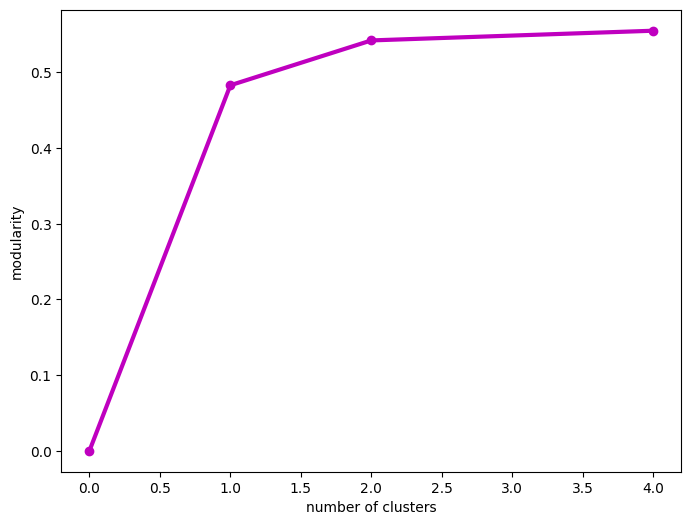

In [12]:
l = [0,0.48300423173449947,0.5422622342078877,0.55508310027878]
clusters = [0,1,2,4]
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(clusters,l,'-o',c='m',linewidth='3')
plt.xlabel('number of clusters')
plt.ylabel('modularity')